In [3]:
import pandas as pd

import sys
sys.path.append("../")
import src.suport as sp

import re
import numpy as np
import seaborn as sns


In [5]:
df = pd.read_csv("../data/output/attacks_clean.csv",encoding = "ISO-8859-1")

In [6]:
df.head()

,date,year,type,country,area,location,activity,sex,injury,fatal_(y/n),time,species,href,species_sorted,age3,month_attack
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,Evening,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,57.000000,Jun
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,Minor injury to left thigh,N,Afternoon,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,11.000000,Jun
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,Injury to left lower leg from surfboard skeg,N,Morning,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,48.000000,Jun
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,Minor injury to lower leg,N,NaN,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,38.590376,Jun
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,36.174184,Jun


Antes de empezar a analizar los datos es bueno hacer una comprobación rápida de la tabla, para ver si todo está bien.

In [7]:
df.columns

Index(['date', 'year', 'type', 'country', 'area', 'location', 'activity',
       'sex', 'injury', 'fatal_(y/n)', 'time', 'species', 'href',
       'species_sorted', 'age3', 'month_attack'],
      dtype='object')

In [8]:
df.dtypes

date               object
year              float64
type               object
country            object
area               object
location           object
activity           object
sex                object
injury             object
fatal_(y/n)        object
time               object
species            object
href               object
species_sorted     object
age3              float64
month_attack       object
dtype: object

Primero quiero comprobar cómo es el perfil de las víctimas de los tiburones.

In [10]:
test = df[df["age3"] != 0]

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

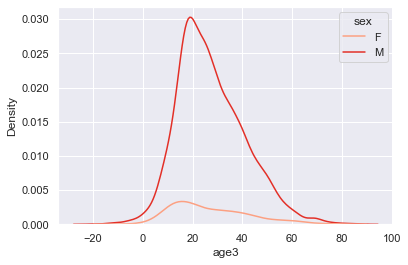

In [15]:
plot=sns.kdeplot(x=test.age3, hue= test.sex, palette="Reds")

In [16]:
fig=plot.get_figure()
fig.savefig("01_victims.jpg") 

Las víctimas favoritas de los tiburones son los machos jóvenes, probablemente mientras practican algún tipo de deporte.

In [17]:
test['activity'].value_counts(dropna=True).head(10)


activity
Surfing         971
Swimming        842
Fishing         423
Spearfishing    333
Bathing         155
Wading          146
Diving          115
Standing         99
Snorkeling       88
Scuba diving     76
Name: count, dtype: int64

In [18]:
dangerous_activities=test['activity'].value_counts(dropna=True).head(10).index


/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


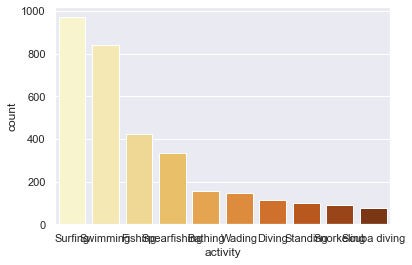

In [19]:
plot2=sns.countplot(x=df["activity"], order=dangerous_activities, palette="YlOrBr")
fig=plot2.get_figure()
fig.savefig("02_Activities.jpg") 

Acortando los valores de la columna "Actividad" podemos confirmar que la mayoría de las víctimas practicaban algún tipo de deporte.

De la columna "time" se desprende que hay más ataques de tiburones por la tarde, probablemente porque hay más víctimas practicando deporte a esas horas. Durante la noche, los tiburones y las personas duermen...

/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


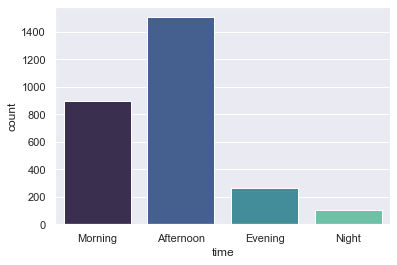

In [20]:
plot3=sns.countplot(x=df["time"], order=["Morning", "Afternoon", "Evening", "Night"], palette="mako")
fig=plot3.get_figure()
fig.savefig("03_Daytime.jpg") 

/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


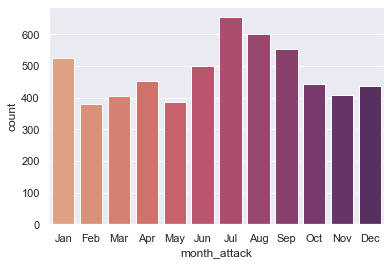

In [22]:
plot4=sns.countplot(x=df["month_attack"], order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], palette="flare")
fig=plot4.get_figure()
fig.savefig("04_Months.jpg") 

Trazar el número de ataques por mes como se ha hecho anteriormente puede dar algunos errores. Como los datos se registran en todo el mundo, hay países en ambos hemisferios. Por lo tanto, el trazado de los ataques en relación con el mes y los países aportará información más útil.

In [25]:
df.country.value_counts(dropna=True).head(10)

country
USA                 2212
AUSTRALIA           1323
SOUTH AFRICA         573
PAPUA NEW GUINEA     130
NEW ZEALAND          127
BRAZIL               112
BAHAMAS              106
MEXICO                89
ITALY                 69
PHILIPPINES           62
Name: count, dtype: int64

/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


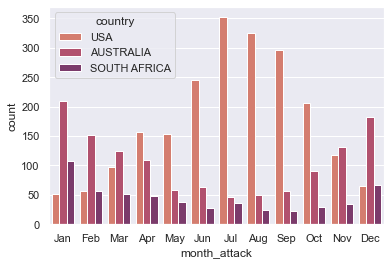

In [26]:
plot5=sns.countplot(x=df["month_attack"], hue=df["country"], order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], hue_order=["USA", "AUSTRALIA", "SOUTH AFRICA"], palette="flare")
fig=plot5.get_figure()
fig.savefig("05_Months_vs_country.jpg") 

EE.UU., Australia y Sudáfrica son los países con más ataques. Se observa que los ataques en EE.UU. (hemisferio norte) se concentran sobre todo en verano, y en Australia y Sudáfrica (hemisferio sur) también en verano.
Durante los meses cálidos hay más actividad en la costa y, por tanto, se registran más ataques.
No soy un experto en tiburones, así que no sé si los tiburones migran, pero podrían desplazarse de norte a sur durante los meses cálidos.

/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

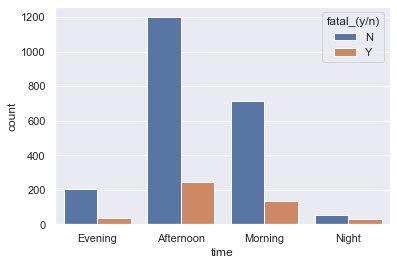

In [27]:
plot6=sns.countplot(x=df["time"], hue=df["fatal_(y/n)"])
fig=plot6.get_figure()
fig.savefig("06_Daytime_vs_Fatal.jpg") 

There is no relation between daytime and fatal attacks, so sharks are not more agressive depending on the hour.

/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


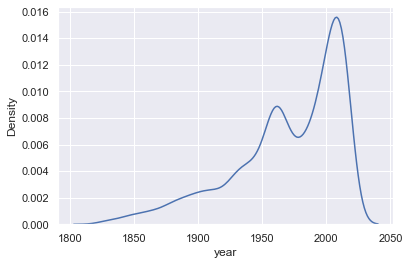

In [28]:
subshark = df[df["year"] >= 1800]
plot7=sns.kdeplot(x=subshark.year)
fig=plot7.get_figure()
fig.savefig("07_Attacks_year.jpg") 

El número de ataques por año aumenta cada año, probablemente porque es más fácil rastrear y registrar cada ataque. Se observa un descenso de los ataques de tiburón en torno a 1975, justo cuando se estrenó la película Tiburón.

Ahora me gustaría ver si hay algunos tiburones más mortíferos que otros, voy a cruzar las columnas Fatal(S/N) y la de la especie. 
Como hay muchas especies diferentes en la lista, voy a seleccionar las que tienen más encuentros.

In [29]:
df.species_sorted.value_counts(dropna=True).head(30)

species_sorted
White shark          430
Tiger shark          234
5' shark             131
Bull shark           126
6' shark             101
4' shark              97
8' shark              52
Nurse shark           47
Wobbegong shark       46
Mako shark            44
Raggedtooth shark     43
3' shark              43
12' shark             41
10' shark             41
7' shark              38
Blacktip shark        33
Lemon shark           32
Blue shark            30
Zambesi shark         29
No shark              23
Hammerhead shark      22
14' shark             20
9' shark              17
13' shark             15
Sandtiger shark       14
15' shark             13
Spinner shark         13
20' shark              8
2' shark               8
75' shark              8
Name: count, dtype: int64

/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


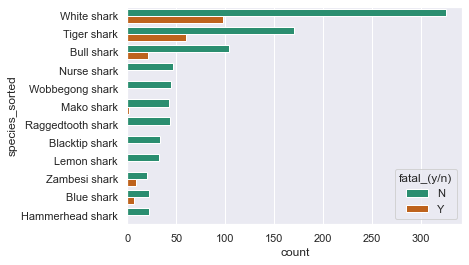

In [30]:
plot8=sns.countplot(y=df["species_sorted"], hue=df["fatal_(y/n)"], order=["White shark", "Tiger shark", "Bull shark", "Nurse shark", "Wobbegong shark", "Mako shark", "Raggedtooth shark", "Blacktip shark", "Lemon shark", "Zambesi shark", "Blue shark", "Hammerhead shark"], palette="Dark2")
fig=plot8.get_figure()
fig.savefig("08_Fatal_shark_attacks.jpg") 

Este gráfico aporta información interesante.
Los ataques más comunes los realizan el tiburón blanco, el tiburón tigre y el tiburón toro, siendo el primero el más activo. Además, si te ataca uno de estos tiburones, tienes un 75% de posibilidades de sobrevivir. Buenas noticias, ¡un ataque de tiburón no siempre es mortal!
Hay algunas especies, como el tiburón nodriza, el tiburón wobbegong, cuyos ataques no son letales para los humanos.

/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


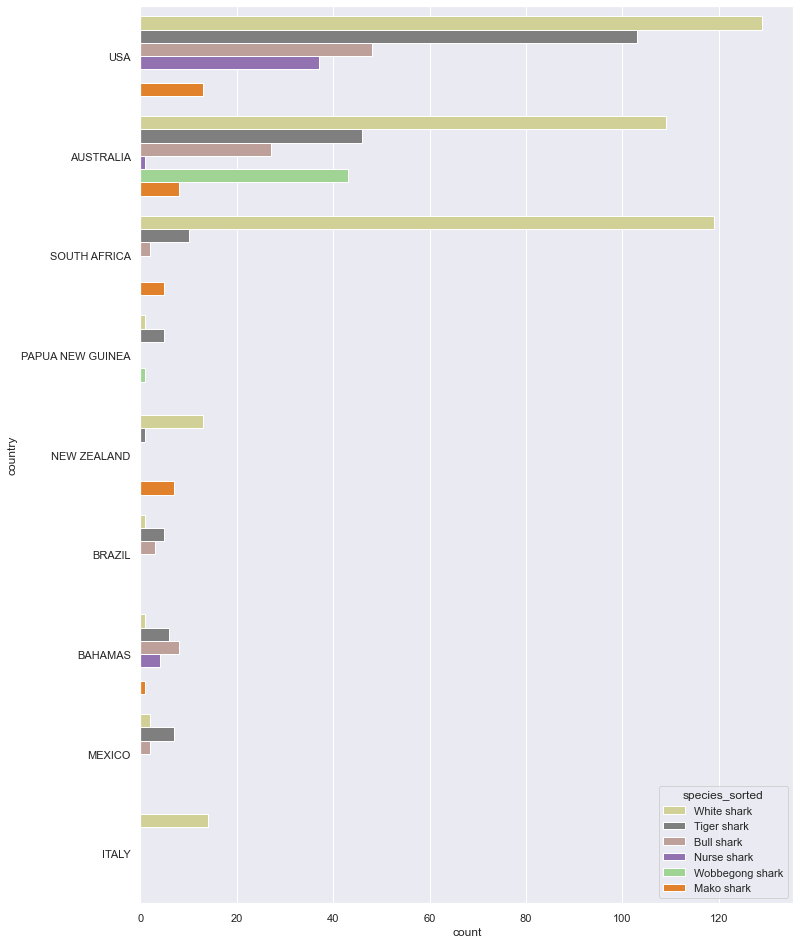

In [31]:
sns.set(rc={'figure.figsize':(11.7,16.5)})
plot9=sns.countplot(hue=df["species_sorted"], y=df["country"], hue_order=["White shark", "Tiger shark", "Bull shark", "Nurse shark", "Wobbegong shark", "Mako shark"], order=["USA", "AUSTRALIA", "SOUTH AFRICA", "PAPUA NEW GUINEA", "NEW ZEALAND", "BRAZIL", "BAHAMAS", "MEXICO", "ITALY"], palette="tab20_r")
fig=plot9.get_figure()
fig.savefig("09_Species_vs_country.jpg") 

Clasificando las especies de tiburones por países en los que atacaron, podemos ver que las especies se localizan en diferentes zonas, por ejemplo, los ataques de tiburón blanco, tiburón tigre y tiburón toro se producen sobre todo en lugares con una extendida cultura de surfistas.

/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/ih_base/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

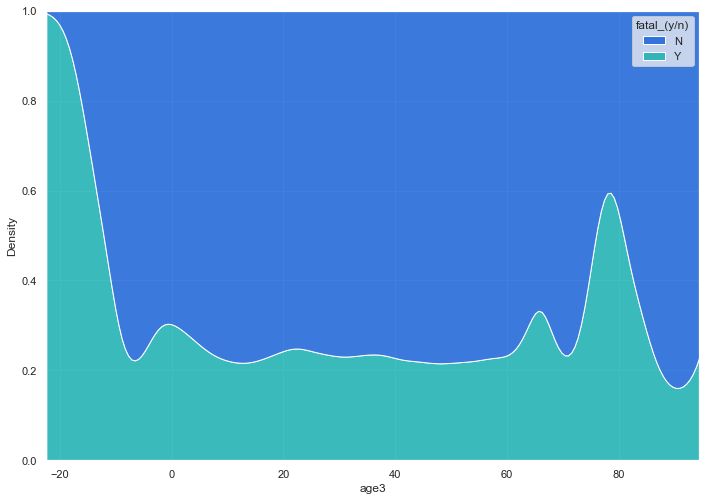

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot10=sns.kdeplot(x=test["age3"], hue= test["fatal_(y/n)"], palette="winter", multiple="fill")
fig=plot10.get_figure()
fig.savefig("10_Survival_Age.jpg") 

Las posibilidades de supervivencia se reducen cuando la víctima es demasiado joven o mayor de 60 años. La fuerza y la velocidad de la víctima pueden ser la causa, cuando llega el momento de luchar con un tiburón.. hehehe